# Task [1] - Calculating the Square Root of 2
***

 Simple calculation using the "**" Operator accurate to 15 decimals

In [1]:
def sqrt2Simp(n):
    # the exponentiation
    # using the exponent (1/2) on a number is the same as getting it's square root
    n  = n**(1/2)
    # printing out 100decimals
    print("{:.100}".format(n))
    # print out normallly
    print(n)
    
sqrt2Simp(2)

1.4142135623730951454746218587388284504413604736328125
1.4142135623730951


###### The Babylonian Method
<img style="float: left;" src="images/babylonian.PNG" width="200" height="100"/>

Calculating using the Babylonian Method accurate to 10 decimals

In [2]:
def sqrt2B1(n):
    """
    A function to calculate the square root of a number n.
    """
    r = n
    x = 0
    # setting 10 decimal accurrency
    a = 0.0000000001

    # Loop until we're happy with the accuracy.
    while abs(r - x) > a:
        r = (r + x) / 2
        x = n / r
    print("{:.100}".format(r))
    # Return the (approximate) square root of n.
    return r

sqrt2B1(2)

1.4142135623746898698271934335934929549694061279296875


1.4142135623746899

# Task[2] - Chi-Squared Test

## Contingency Table
***

The table provided for this task is an example of a Contingency Table.[1]

***
- .[1] Contingency Tables, https://en.wikipedia.org/wiki/Contingency_table
***
###### Wikipedia example of Contigency Table 

<img style="float: left;" src="images/ContigencyTable.PNG">




In [3]:
"""
The display of Contingency Table for ease of reading
"""

# Data frames
import pandas as pd 

data = {'': ['White collar', 'Blue collar', 'No collar'],
        'A':[90, 30, 30],
        'B':[60, 50, 40], 
        'C':[104, 51, 45], 
        'D':[95, 20, 35]}

#Setting value to index
df = pd.DataFrame(data).set_index('')

#Total sum per column: 
df.loc['Total']= df.sum(axis=0)

#Total sum per row: 
df['Total'] = df.sum(axis=1)

df

,A,B,C,D,Total
,,,,,
White collar,90,60,104,95,349
Blue collar,30,50,51,20,151
No collar,30,40,45,35,150
Total,150,150,200,150,650


## Calculating the Chi-Square and P values
***
Scipy.stats contains multiple functions to calculate the Chi-Square value.[1]

Do to the fact the table given is an example of a Contingency Table, I thought it appropriate to contingency function chi2_contingency(observed, correction=True, lambda_=None).[2].  Only the observed is needed in this case.

This function returns the test statistic, p-value, degree of freedom and expected frequencies.  Only the first 2 are necessary for this task.


***
- .[1] Documentation for scipy.stats, https://docs.scipy.org/doc/scipy/reference/stats.html  
- .[2] Function for Chi-square test of independence of variables in a contingency table, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency
***

In [4]:
#Statistics package
import scipy.stats as ss

#Observed Data
obsData = [[90, 30, 30],
         [60, 50, 40],
         [104, 51, 45],
         [95, 20, 35]]

#chi2_contingency - Chi-square test of independence of variables in a contingency table
stat, p, dof, expected  = ss.chi2_contingency(obsData)

print(f"Approximate Chi-squared value: {stat:0.1f}")
print('Actual Chi-squared value:', stat)

print('\nP-Value:', p)
print(f"P_Value: {p:0.2f}")


Approximate Chi-squared value: 24.6
Actual Chi-squared value: 24.571202858582602

P-Value: 0.0004098425861096692
P_Value: 0.00


***
# Task[3] - Excels functions for Standard Deviation

## Setting data sets of Population and Samples
***

### STDEV.P
***

Returns an estimation for the standard deviation of a population, this is when the full data set is known.  An example of this if the data set was a sensis of the entire population of a country.

STDEV.P calculates the standard deviation of a data set, it does this by using the "n" method which is as follows:

<img style="float: left;" src="images/StandardDeviation.gif" width="200" height="100"/>


### STDEV.S
***

Returns an estimation for the standard devaition of a sample, this is when you have part of a data set is known. An example of this would be a survey of set of people in a country, this may be region or other.

STDEV.S uses a similiar formula to the one above but instead of dividing by "N" it divides "N-1".  This is known as "Bessel's Correction".[1]

- .[1] Bessel's Correction, https://en.wikipedia.org/wiki/Bessel%27s_correction


In [5]:
# Efficient numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Data frames
import pandas as pd

Documentation on how to create a random set of data to act as the population. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [52]:
'''
Create a random data set for the population.
'''

# Setting the mean, standard deviation and size of populaiton
m_a, s_a = 1.0, 0.4
N = 50

# Population data set
a = np.random.normal(m_a, s_a, N)

# Skick sample in data frame.
df = pd.DataFrame({'Population': ['A'] * len(a), 'Value': a})
pd.set_option('max_rows', 10)

# Printing the population data set
print(df)


Part of the Population Data

   Population     Value
0           A  0.886726
1           A  1.491464
2           A  1.118450
3           A  1.352971
4           A  0.632136
..        ...       ...
45          A  0.275282
46          A  1.015709
47          A  1.523150
48          A  0.879914
49          A  1.390089

[50 rows x 2 columns]


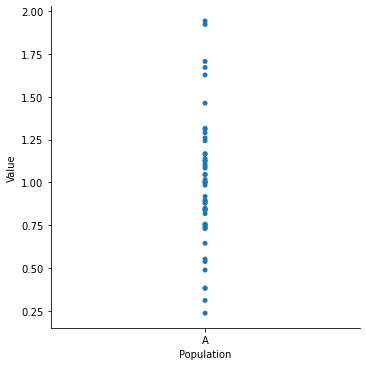

In [7]:
# Plot of Population.
sns.catplot(x='Population', y='Value', jitter=False, data=df);

In [8]:
'''
Standard deviation of population using the equivalent of Excels STDEV.P.
'''
# Standard deviation for population
sd = np.std(a)

print(f"Standard Deviation of Population A: {sd:0.4f}")

Standard Deviation of Population A: 0.3755


***
Documentation to get samples from the given population. https://docs.scipy.org/doc/numpy-1.10.4/reference/generated/numpy.random.choice.html

In [51]:
'''
Getting random sample sets from population.
'''

# Setting size of sample
n1, n2 = 30, 20

# Sample data sets from poplution
sample_1 = np.random.choice(a, n1, replace=False)
sample_2 = np.random.choice(a, n2, replace=False)

# Stick both samples in one data frame.
sdf = pd.DataFrame({'Sample': ['1'] * len(sample_1) + ['2'] * len(sample_2), 'Value': np.hstack([sample_1,sample_2])})
pd.set_option('max_rows', 10)

print(sdf)


Part of the Sample Data

   Sample     Value
0       1  1.256485
1       1  1.458232
2       1  1.601504
3       1  1.257846
4       1  1.517519
..    ...       ...
45      2  1.256485
46      2  1.002595
47      2  1.461471
48      2  0.880891
49      2  0.696334

[50 rows x 2 columns]


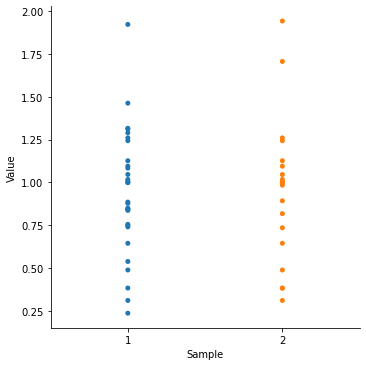

In [10]:
# Plot 
sns.catplot(x='Sample', y='Value', jitter=False, data=sdf);

In [11]:
'''
Standard deviation of sample 1 using the equivalent of Excels STDEV.P and STDEV.S.
'''

# Standard deviation using STDEV.P
sdp_samp_1 = np.sqrt(np.sum((sample_1 - np.mean(sample_1))**2)/len(sample_1))
# Standard deviation using STDEV.S
sds_samp_1 = np.sqrt(np.sum((sample_1 - np.mean(sample_1))**2)/(len(sample_1)-1))


print("Sample 1:")
print(f"Standard Deviation using STDEV.P: {sdp_samp_1:0.4f}")
print(f"Standard Deviation using STDEV.S: {sds_samp_1:0.4f}")

Sample 1:
Standard Deviation using STDEV.P: 0.3538
Standard Deviation using STDEV.S: 0.3598


In [12]:
'''
Standard deviation of sample 2 using the equivalent of Excels STDEV.P and STDEV.S.
'''

# Standard deviation using STDEV.P
sdp_samp_2 = np.sqrt(np.sum((sample_2 - np.mean(sample_2))**2)/len(sample_2))
# Standard deviation using STDEV.S
sds_samp_2 = np.sqrt(np.sum((sample_2 - np.mean(sample_2))**2)/(len(sample_2)-1))

print("Sample 2:")
print(f"Standard Deviation using STDEV.P: {sdp_samp_2:0.4f}")
print(f"Standard Deviation using STDEV.S: {sds_samp_2:0.4f}")  

Sample 2:
Standard Deviation using STDEV.P: 0.4026
Standard Deviation using STDEV.S: 0.4131


### Conclusion
***

In this example, the Standard Deviation of the entire population using STDEV.P is "0.3666".

First sample STDEV.P = "0.3299", STDEV.S = "0.3355".<br>
Second sample STDEV.P = "0.3516", STDEV.S = "0.3607".

In both of these situation using STDEV.S gave us a standard deviation that was closer to the populations true standard deviation.

The reasoning behind this is that the "n-1 or STDEV.S" method gives a more generalised idea as its is used as an esitmation for the standard deviation of the entire population.  On the otherhand the "n or STDEV.P" gives an exact value of the standard deviation of the sample itself.

# Task[4] - Iris data set

In [13]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Machine learning - kmeans.
import sklearn.cluster as skcl

# Datasets - Iris.
import sklearn.datasets as skds

Wikipedia article on Iris data set. https://en.wikipedia.org/wiki/Iris_flower_data_set#<br>
Documentation used to load the Iris data set. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

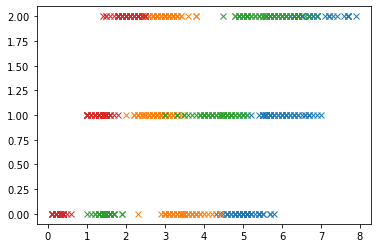

In [14]:
# Iris data set.
iris = skds.load_iris()
iris

# Set variables for ease of use
dataSet = iris.data
target = iris.target
target_names = iris.target_names

# Plotting the data set.
plt.plot(dataSet, target, 'x')

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [15]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(dataSet)

***
The labels are used by kmeans to estimate which group each object in the data set belongs to.  In this case there is 3 possible group. 0 represents "setosa", 1 represents "versicolor" and 2 represents "virginica".

In [16]:
# Labels of the point.
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

***
Each grouping represents the type of flower as stated already.  The different colour present represent the factors of the flower and commented below.

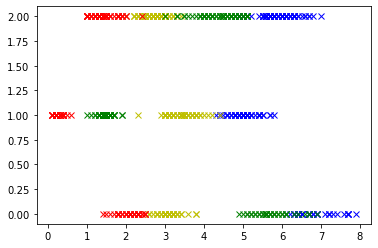

In [18]:
plt.plot(dataSet[:,0], labels, 'bx') # sepal length
plt.plot(dataSet[:,1], labels, 'yx') # sepal width
plt.plot(dataSet[:,2], labels, 'gx') # petal length
plt.plot(dataSet[:,3], labels, 'rx') # petal width

***
Predict is used in kmeans to predict where the sample value should go.  As seen in the following diagram, represented in black, kmeans is able to place the values into the cluster in which they closet resemble.

In [19]:
# Setting new values to be tested
newvals = np.array([[5,3,1.4,0.5], [7.2,3.2,4,1], [7, 2.8, 6, 2.4]])
# Predict the closest cluster each sample in dataSet belongs to.
predictions = kmeans.predict(newvals)
predictions

array([1, 2, 0])

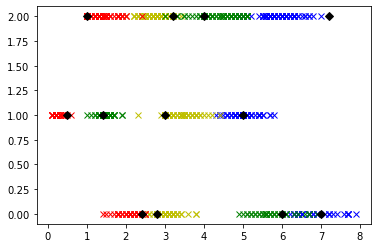

In [20]:
plt.plot(dataSet[:,0], labels, 'bx') # sepal length
plt.plot(dataSet[:,1], labels, 'yx') # sepal width
plt.plot(dataSet[:,2], labels, 'gx') # petal length
plt.plot(dataSet[:,3], labels, 'rx') # petal width

# Plotting new values
plt.plot(newvals[:,0], predictions, 'kD')
plt.plot(newvals[:,1], predictions, 'kD')
plt.plot(newvals[:,2], predictions, 'kD')
plt.plot(newvals[:,3], predictions, 'kD')

***
Using the "cluster_centers_" kmeans is able to calculate the center of each cluster present in each group.  The use of the predict method here was fit these center value in the correct group position and seen in the plot graph.

In [93]:
# The centres of clusters.
cent = kmeans.cluster_centers_
centVal = kmeans.predict(cent)
print(cent,  "\n")
print(centVal)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]] 

[0 1 2]


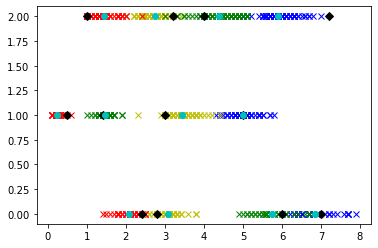

In [22]:
# Data set values.
plt.plot(dataSet[:,0], labels, 'bx') # sepal length
plt.plot(dataSet[:,1], labels, 'yx') # sepal width
plt.plot(dataSet[:,2], labels, 'gx') # petal length
plt.plot(dataSet[:,3], labels, 'rx') # petal width

# Predicted values.
plt.plot(newvals[:,0], predictions, 'kD')
plt.plot(newvals[:,1], predictions, 'kD')
plt.plot(newvals[:,2], predictions, 'kD')
plt.plot(newvals[:,3], predictions, 'kD')

# Center values of each cluster in data set.
plt.plot(cent[:,0], centVal, 'co')
plt.plot(cent[:,1], centVal, 'co')
plt.plot(cent[:,2], centVal, 'co')
plt.plot(cent[:,3], centVal, 'co')

***
Documentation for crosstab in pandas. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
<br><br>
Using crosstab it is possible to check the accurancy of "kmeans.labels".  This is done by comparing this to the way the "iris.target" method present in the iris data set has grouped the values.
<br><br>
Kmeans Grouping:<br>
Setosa - all have been grouped the same as Iris data set.<br>
Versicolor - all but too have been grouped correctly, this is an expectable amount of accuracy.<br>
Virginica - 12 have been grouped differently, overall this is not extreme.
<br><br>
Kmeans seem to be quite accurate in the way it groups the data set and in its predictions.  The method is not perfect as seen by the outliers discussed and compared below.  Overall this about of discrepancy is acceptable

In [91]:
# Data frames
import pandas as pd
# Comparing the target given and the estimation
df = pd.crosstab(target, labels)

print(target_names, "\n")
print(df)

['setosa' 'versicolor' 'virginica'] 

col_0   0   1   2
row_0            
0       0  50   0
1       2   0  48
2      36   0  14


The accurrency of kmeans means can be seen above when comparing the actual and the assumed, in this case the target and labels.

***
# End